In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from scipy.stats import mode
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10

In [3]:
class KNearestNeighbors:
    def __init__(self, k):
        self.neighbors = k
        
    def fit(self, X, Y):
        self.data = X
        self.labels = Y
        
    def predict(self, X):
        yPredicted = np.empty(X.shape[0], 1)
        
        # row iterates for however long X is
        for row in range(X.shape[0]):
            # takes row in every point
            datapoint = [row, ]
            
            # distance is the norm of the traing data X - xi
            distances = np.sqrt(np.sum(((self.data - datapoint) ** 2), axis = 1))
            
            # sort distances in increasing order
            indices = np.argsort(distances)[:self.neighbors]
            
            # tells us the rows in the labels to look for the closest points
            nearestClasses = self.labels[indices]
            
            yPredicted[row] = int(sp.stats.mode(nearestClasses)[0][0])
        
        return yPredicted

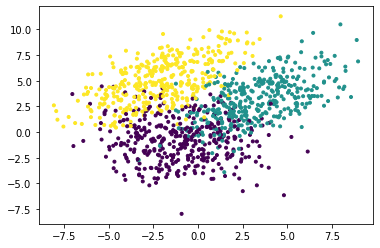

In [4]:
# number of points to generate
numberOfPoints = 500

# generate points from class 0
mean1 = np.array([-1, -1])
covariance1 = np.array([[5, 0], [0, 5]])
X1 = np.random.multivariate_normal(mean1, covariance1, numberOfPoints)

# generate points from class 1
mean2 = np.array([3, 3])
covariance2 = np.array([[5, 3], [3, 5]])
X2 = np.random.multivariate_normal(mean2, covariance2, numberOfPoints)

# generate points from class 2
mean3 = np.array([-2, 5])
covariance3 = np.array([[5, 3], [3, 5]])
X3 = np.random.multivariate_normal(mean3, covariance3, numberOfPoints)

# stack the points
X = np.vstack((X1, X2, X3))

# create a vector of the labels
Y = np.hstack((numberOfPoints * [0], numberOfPoints * [1], numberOfPoints * [2]))

# randomly choose 75% of the data to be the training set and 25% for the testing set
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state = 1)

# plot the training set
plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')